# Introduction

# Preparation

## Clone git repository


    git clone https://github.com/mydatasciencecourse/RepData_PeerAssessment1.git

# Loading and preprocessing the data

Show any code that is needed to

1. Load the data (i.e. read.csv())
2. Process/transform the data (if necessary) into a format suitable for your analysis## Read in the files

Lets look for interesting files:

In [226]:
allFiles=list.files()
zipFile=allFiles[grepl("*\\.zip", allFiles)]
print(zipFile)

[1] "activity.zip"


The file we are interested in is: activity.zip. Lets unzip it:

In [227]:
unzip(zipFile)
files=list.files()
dataFile=files[grepl("activity.csv", files)]
print(dataFile)

[1] "activity.csv"


File is there, so lets read it in:

In [228]:
readLines(dataFile, n=3)
data=read.csv(dataFile)
str(data)

[1] "\"steps\",\"date\",\"interval\"" "NA,\"2012-10-01\",0"            
[3] "NA,\"2012-10-01\",5"

'data.frame':	17568 obs. of  3 variables:
 $ steps   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ date    : Factor w/ 61 levels "2012-10-01","2012-10-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ interval: int  0 5 10 15 20 25 30 35 40 45 ...


As seen above, the date is read in as factor. Lets correct it now:

In [229]:
data$date=as.Date(data$date)
str(data)
head(data)
head(data$date);tail(data$date)
head(data$interval, n=20);tail(data$interval, n=20)
summary(data)

'data.frame':	17568 obs. of  3 variables:
 $ steps   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ date    : Date, format: "2012-10-01" "2012-10-01" ...
 $ interval: int  0 5 10 15 20 25 30 35 40 45 ...


,steps,date,interval
1,NA,2012-10-01,0
2,NA,2012-10-01,5
3,NA,2012-10-01,10
4,NA,2012-10-01,15
5,NA,2012-10-01,20
6,NA,2012-10-01,25


[1] "2012-10-01" "2012-10-01" "2012-10-01" "2012-10-01" "2012-10-01"
[6] "2012-10-01"

[1] "2012-11-30" "2012-11-30" "2012-11-30" "2012-11-30" "2012-11-30"
[6] "2012-11-30"

[1]   0   5  10  15  20  25  30  35  40  45  50  55 100 105 110 115 120 125 130
[20] 135

[1] 2220 2225 2230 2235 2240 2245 2250 2255 2300 2305 2310 2315 2320 2325 2330
[16] 2335 2340 2345 2350 2355

     steps             date               interval     
 Min.   :  0.00   Min.   :2012-10-01   Min.   :   0.0  
 1st Qu.:  0.00   1st Qu.:2012-10-16   1st Qu.: 588.8  
 Median :  0.00   Median :2012-10-31   Median :1177.5  
 Mean   : 37.38   Mean   :2012-10-31   Mean   :1177.5  
 3rd Qu.: 12.00   3rd Qu.:2012-11-15   3rd Qu.:1766.2  
 Max.   :806.00   Max.   :2012-11-30   Max.   :2355.0  
 NA's   :2304                                          

Looks good: Date is a proper date. Please note, that the intervall is **not** the number of minutes since beginnign of day. It is an identifier which ranges from 0 to 2355, with an intervall of 5 but skipping some values.

# What is mean total number of steps taken per day?

For this part of the assignment, you can ignore the missing values in the dataset.

1. Calculate the total number of steps taken per day
2. If you do not understand the difference between a histogram and a barplot, research the difference between them. Make a histogram of the total number of steps taken each day
3. Calculate and report the mean and median of the total number of steps taken per day

In [230]:
library(reshape2)
library(ggplot2)

byDateAndIntervall=melt(data, id.vars = c("date", "interval"))
byDateAndIntervall$value=as.double(byDateAndIntervall$value)

Now, lets calculate sum, mean and median. If there are no values, it should be filled with 0s in case of median and mean.

In [231]:
dailyTotal=dcast(byDateAndIntervall, date ~ "total", sum, na.rm=T)
dailyMean=dcast(byDateAndIntervall, date ~ "mean", mean, na.rm=T, fill=0)
dailyMedian=dcast(byDateAndIntervall, date ~ "median", median, na.rm=T, fill=0)

Put everything together and melt again. Now, there is one column indicating the type of variable (mean, median, sum) and can be used for faceting plots.

In [232]:
combined=cbind(dailyTotal, mean=dailyMean$mean)
combined=cbind(combined, median=dailyMedian$median)
byDate=melt(combined, id.vars = c("date"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


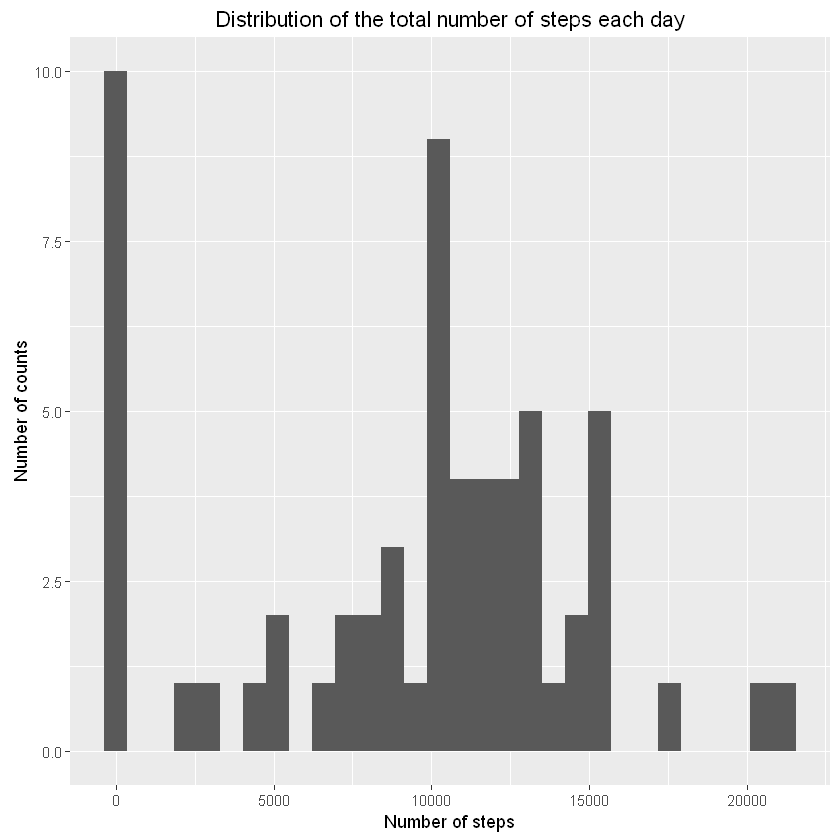

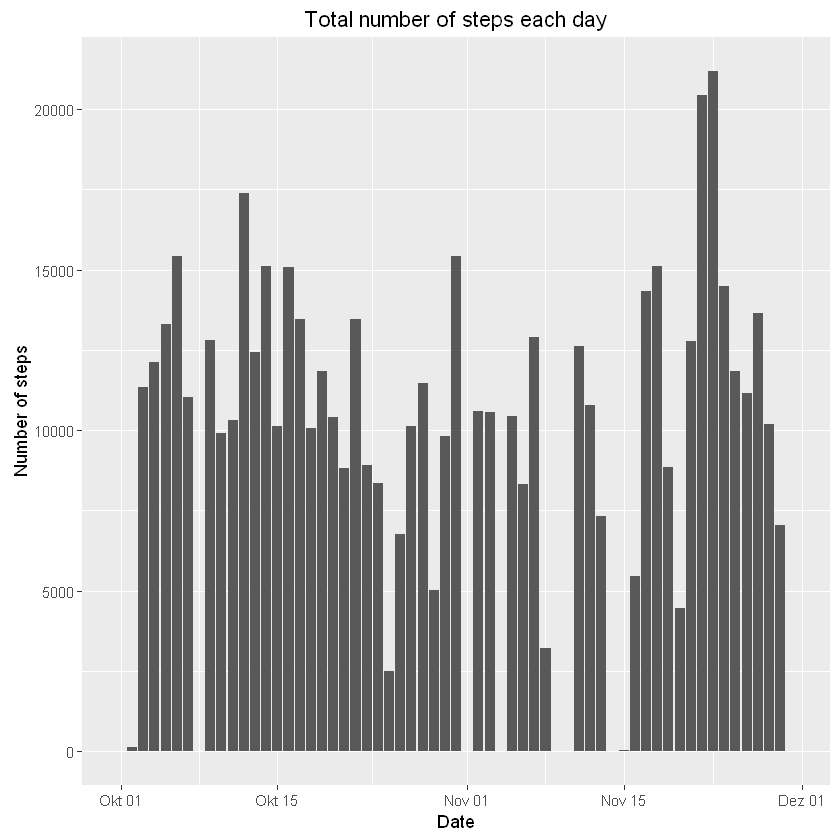

In [233]:
ggplot(data=dailyTotal, aes(total))+
    geom_histogram()+
    labs(x="Number of steps", y="Number of counts", title="Distribution of the total number of steps each day")
ggplot(data=dailyTotal, aes(date, total))+
    geom_bar(stat = "identity")+
    labs(x="Date", y="Number of steps", title="Total number of steps each day")

Finally, lets calculate the mean of the steps per day:

In [234]:
mean(dailyTotal$total)

[1] 9354.23

... and the median

In [235]:
median(dailyTotal$total)

[1] 10395

# What is the average daily activity pattern?

1. Make a time series plot (i.e. type = "l") of the 5-minute interval (x-axis) and the average number of steps taken, averaged across all days (y-axis)
2. Which 5-minute interval, on average across all the days in the dataset, contains the maximum number of steps?

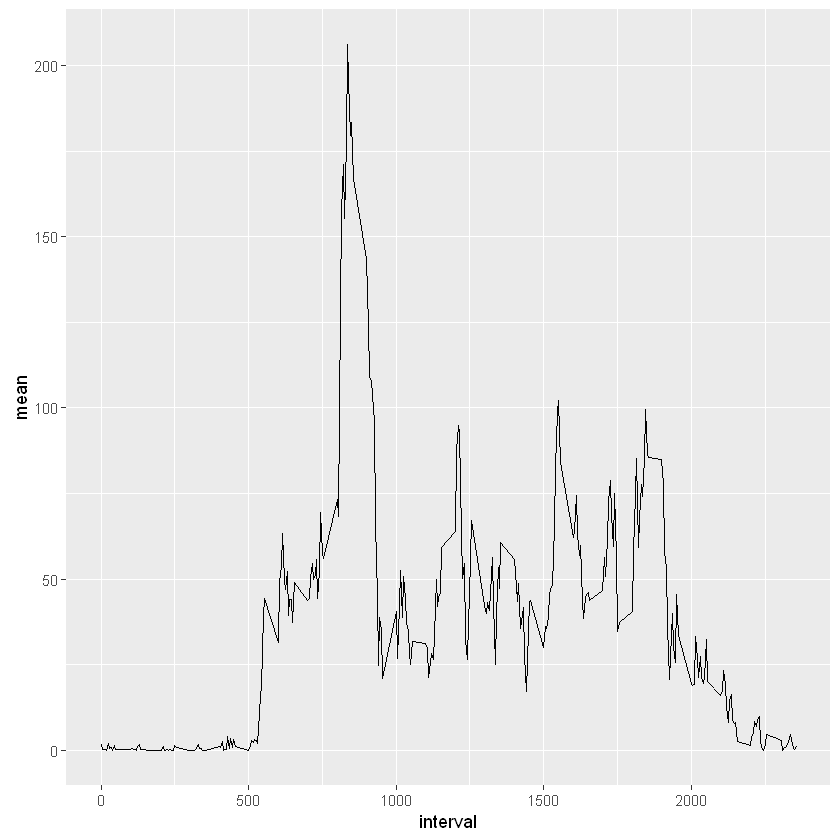

In [236]:
intervallMean=dcast(byDateAndIntervall, interval ~ "mean", mean, na.rm=T)
qplot(interval, mean, data=intervallMean, geom = "line")

Five minute intervall with the highest number of steps:

In [237]:
intervallMean[which.max(intervallMean$mean), "interval"]

[1] 835

# Imputing missing values

Note that there are a number of days/intervals where there are missing values (coded as NA). The presence of missing days may introduce bias into some calculations or summaries of the data.

1. Calculate and report the total number of missing values in the dataset (i.e. the total number of rows with NAs)
2. Devise a strategy for filling in all of the missing values in the dataset. The strategy does not need to be sophisticated. For example, you could use the mean/median for that day, or the mean for that 5-minute interval, etc.
3. Create a new dataset that is equal to the original dataset but with the missing data filled in.
4. Make a histogram of the total number of steps taken each day and Calculate and report the mean and median total number of steps taken per day. Do these values differ from the estimates from the first part of the assignment? What is the impact of imputing missing data on the estimates of the total daily number of steps?